In [1]:
import pickle
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
import cv2 as cv
from tensorflow import keras 
from tensorflow.keras import layers 

In [2]:
file=open("/home/seun/Documents/Programme/Python/SudokuSolver/test/Dataset/Dataset.dat","rb")
dataset=pickle.load(file)
file.close()

Samplesize:  445
Format: ('Label', 'Data')
Shape (Data): (20, 20, 3)


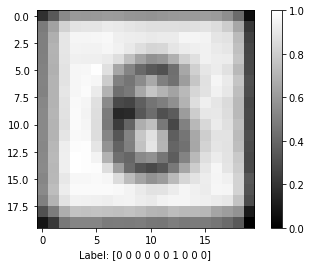

Shape (X_Train): (400, 20, 20, 1)
Shape (Y_Train): (400, 10)
Shape (X_Test): (44, 20, 20, 1)
Shape (Y_Test): (44, 10)


In [3]:
print("Samplesize: ",len(dataset))
print("Format:", dataset[0])
print("Shape (Data):",dataset[1][1].shape)
X,Y=[],[]

dist=np.zeros(10)
for e in dataset[1:]:
    X.append(cv.cvtColor(e[1],cv.COLOR_RGB2GRAY)/255)
    y=np.zeros(10,dtype=np.uint8)
    y[int(e[0])]=1
    Y.append(y)
    dist[int(e[0])]+=1


c = list(zip(X, Y))
random.shuffle(c)
X, Y = zip(*c)


i=round(len(X)*0.9)

X_Train,Y_Train,X_Test,Y_Test=np.array(X[:i],dtype=np.float),\
                              np.array(Y[:i],dtype=np.uint8),\
                              np.array(X[i:],dtype=np.float),\
                              np.array(Y[i:],dtype=np.uint8)

X_Train = np.expand_dims(X_Train, -1)
X_Test = np.expand_dims(X_Test, -1)

plt.imshow(X[21],cmap="gray")
plt.xlabel("Label: "+str(Y[21]))
plt.colorbar()
plt.show()
print("Shape (X_Train):", X_Train.shape)
print("Shape (Y_Train):", Y_Train.shape)
print("Shape (X_Test):", X_Test.shape)
print("Shape (Y_Test):", Y_Test.shape)

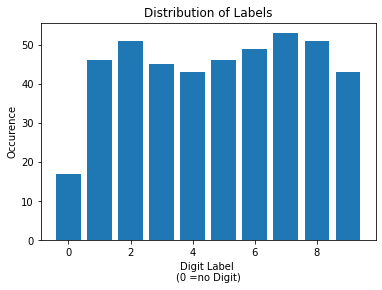

In [4]:
plt.bar(range(10),dist)
plt.title("Distribution of Labels")
plt.xlabel("Digit Label \n(0 =no Digit)")
plt.ylabel("Occurence")
plt.show()


In [5]:
num_classes = 10
input_shape = (20, 20, 1)
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 18, 18, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dropout (Dropout)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                5

In [6]:
batch_size = 40
epochs = 70

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history=model.fit(X_Train, Y_Train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/70
9/9 [==============================] - 0s 39ms/step - loss: 2.3009 - accuracy: 0.1056 - val_loss: 2.2535 - val_accuracy: 0.1500
Epoch 2/70
9/9 [==============================] - 0s 18ms/step - loss: 2.2740 - accuracy: 0.1222 - val_loss: 2.2397 - val_accuracy: 0.1500
Epoch 3/70
9/9 [==============================] - 0s 21ms/step - loss: 2.2367 - accuracy: 0.1667 - val_loss: 2.2188 - val_accuracy: 0.2750
Epoch 4/70
9/9 [==============================] - 0s 20ms/step - loss: 2.2037 - accuracy: 0.1833 - val_loss: 2.1965 - val_accuracy: 0.3000
Epoch 5/70
9/9 [==============================] - 0s 18ms/step - loss: 2.1643 - accuracy: 0.2694 - val_loss: 2.1600 - val_accuracy: 0.4250
Epoch 6/70
9/9 [==============================] - 0s 20ms/step - loss: 2.1167 - accuracy: 0.3528 - val_loss: 2.0992 - val_accuracy: 0.5250
Epoch 7/70
9/9 [==============================] - 0s 19ms/step - loss: 2.0506 - accuracy: 0.3833 - val_loss: 2.0427 - val_accuracy: 0.5250
Epoch 8/70
9/9 [===========

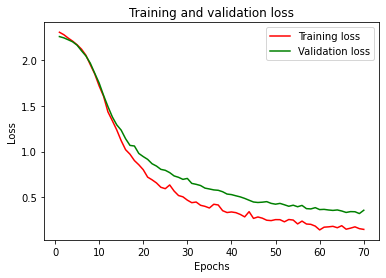

In [7]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
score = model.evaluate(X_Test, Y_Test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.36938217282295227
Test accuracy: 0.9090909361839294


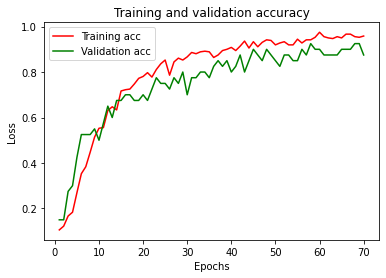

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Label: 5
Layer 0:




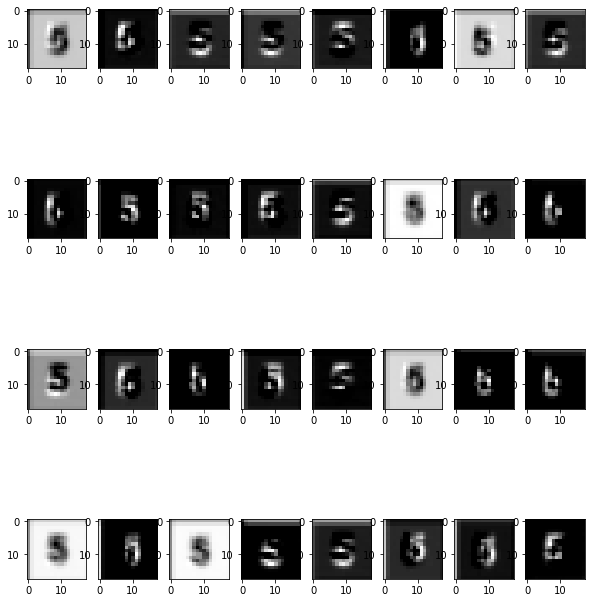

Layer 1:




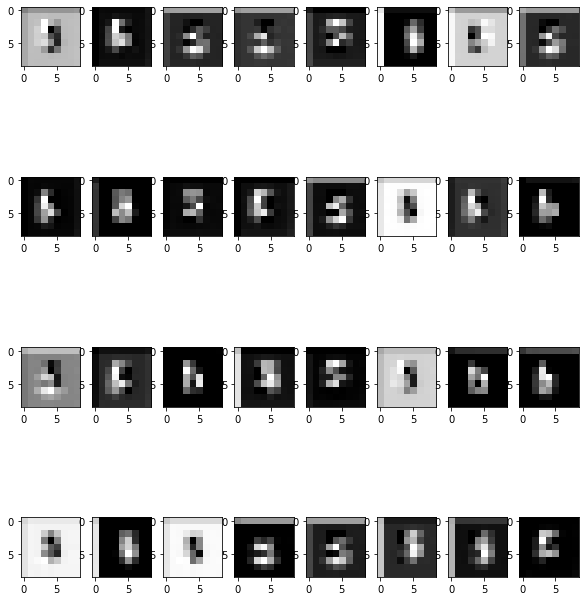

Layer 2:




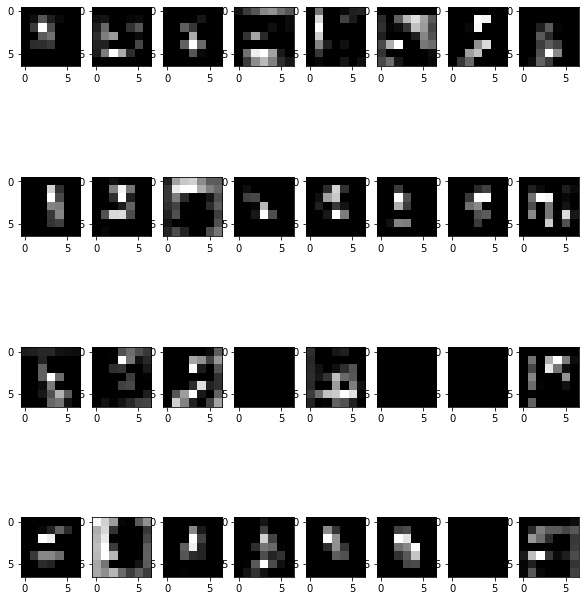


Label: 8
Layer 0:




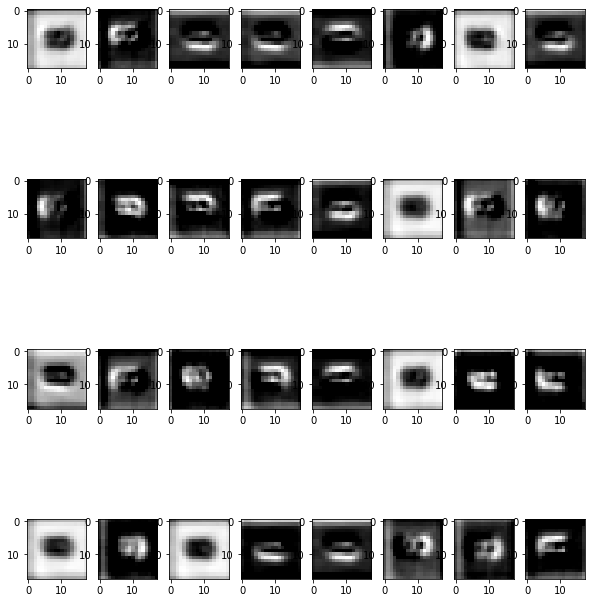

Layer 1:




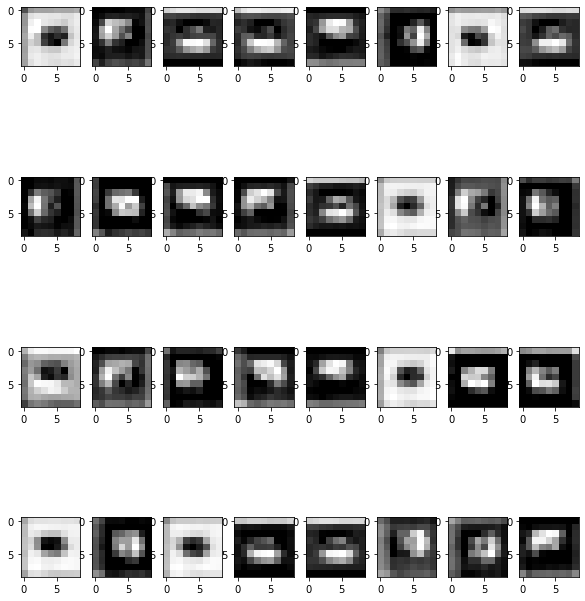

Layer 2:




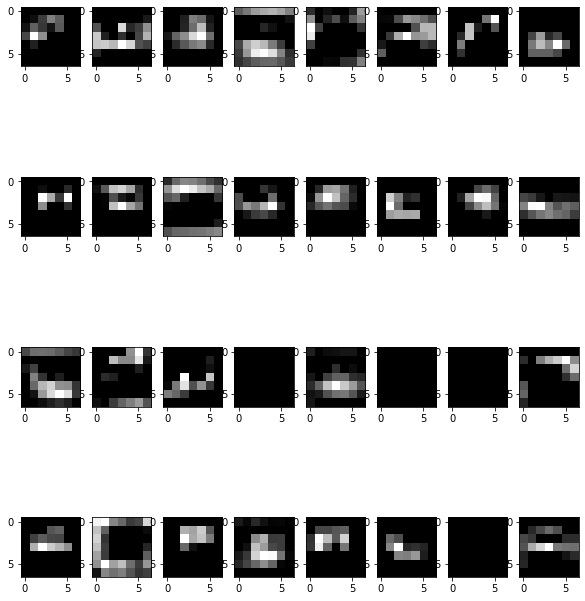


Label: 4
Layer 0:




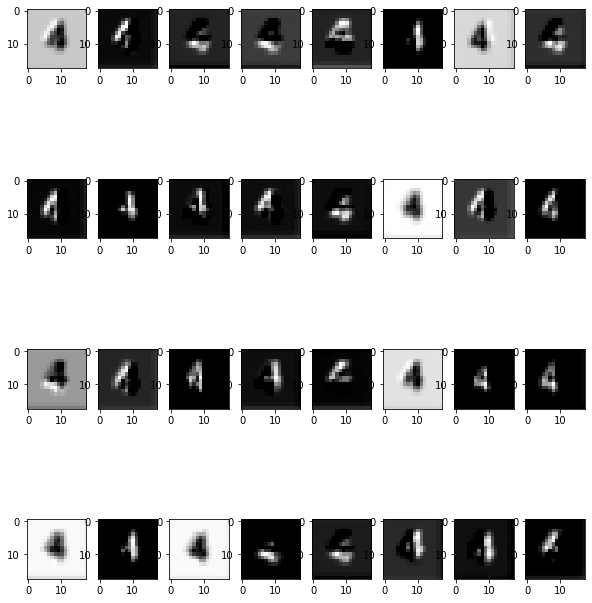

Layer 1:




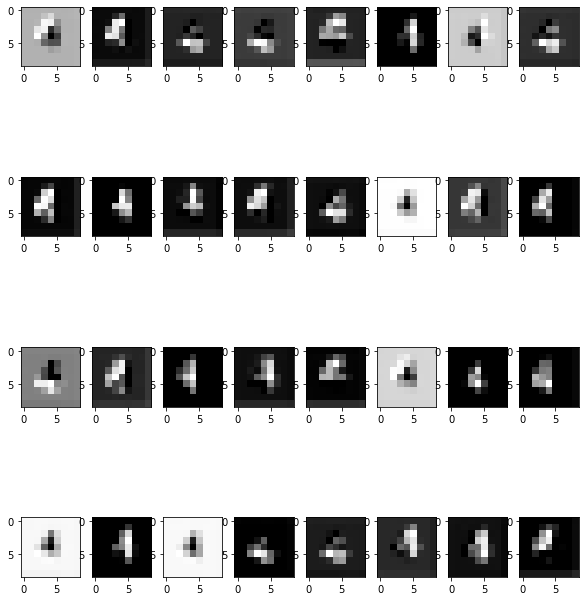

Layer 2:




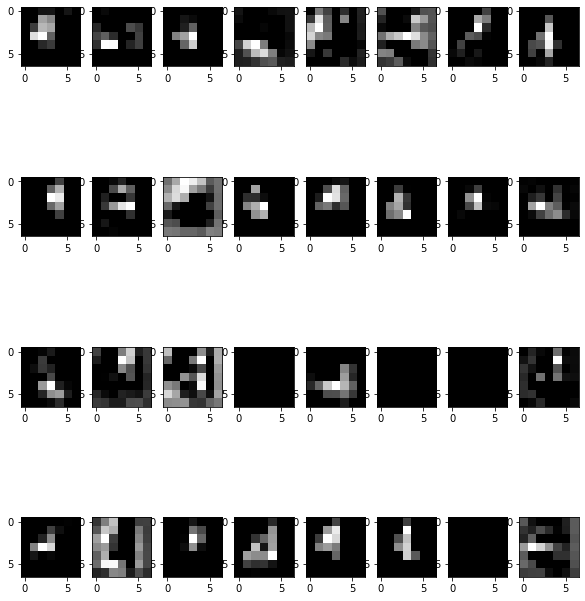


Label: 9
Layer 0:




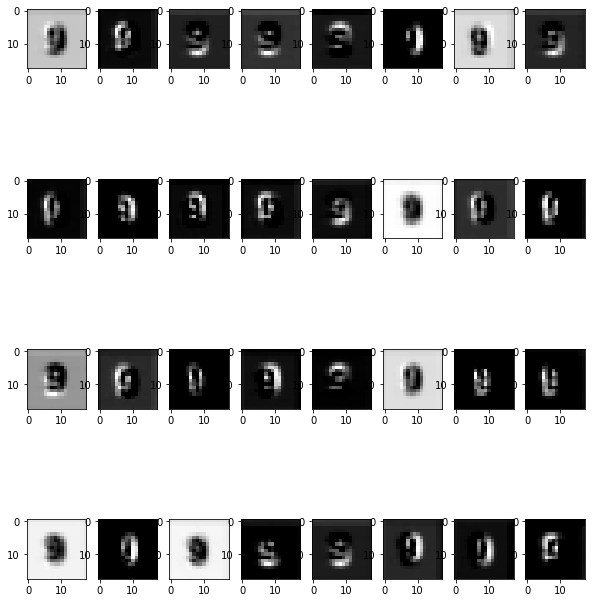

Layer 1:




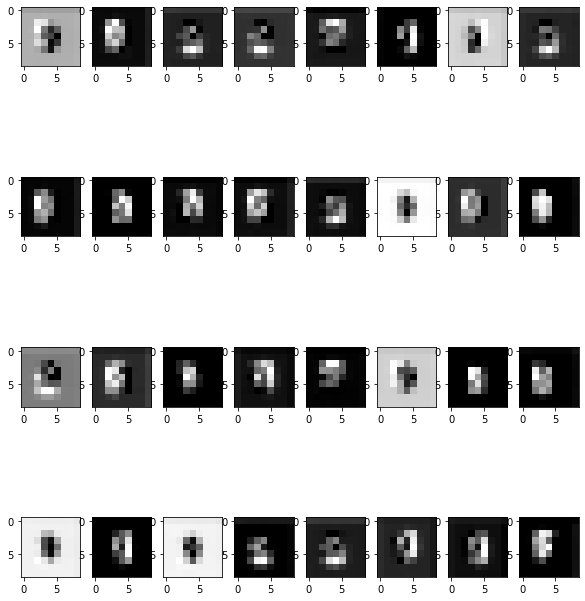

Layer 2:




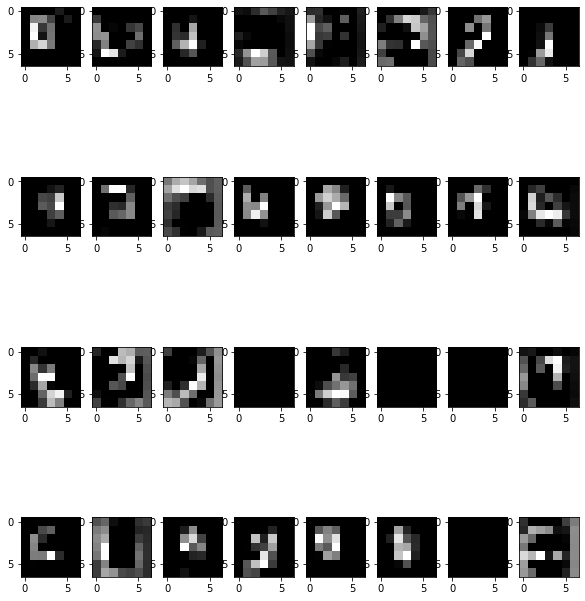


Label: 7
Layer 0:




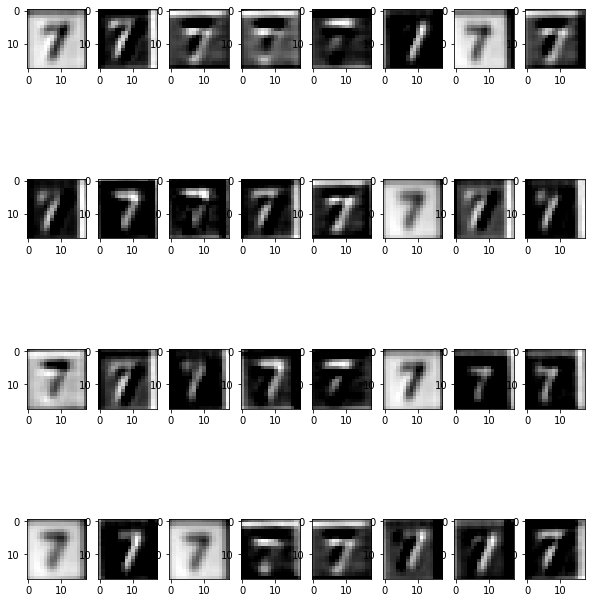

Layer 1:




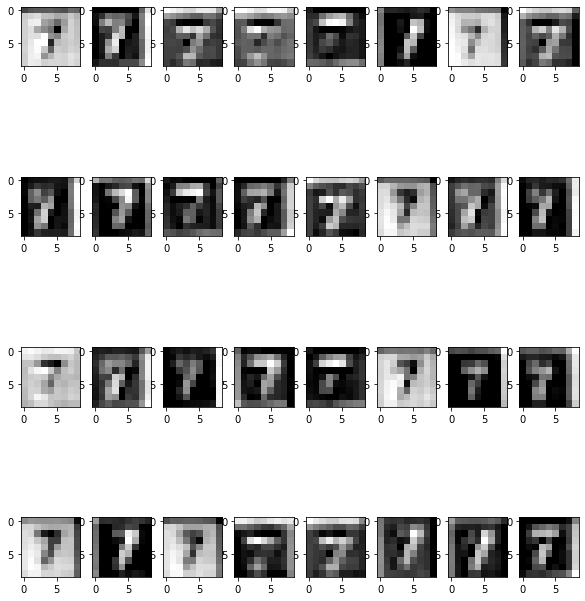

Layer 2:




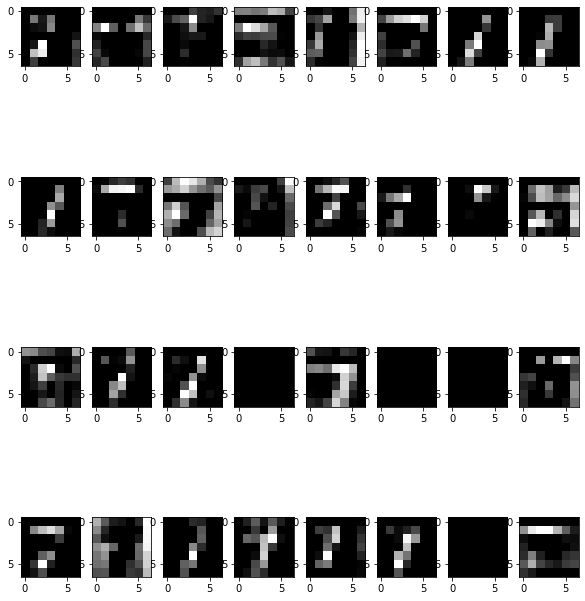


Label: 2
Layer 0:




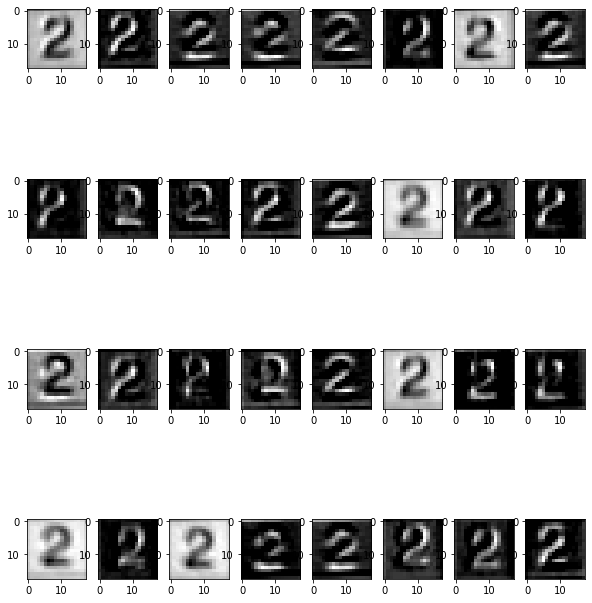

Layer 1:




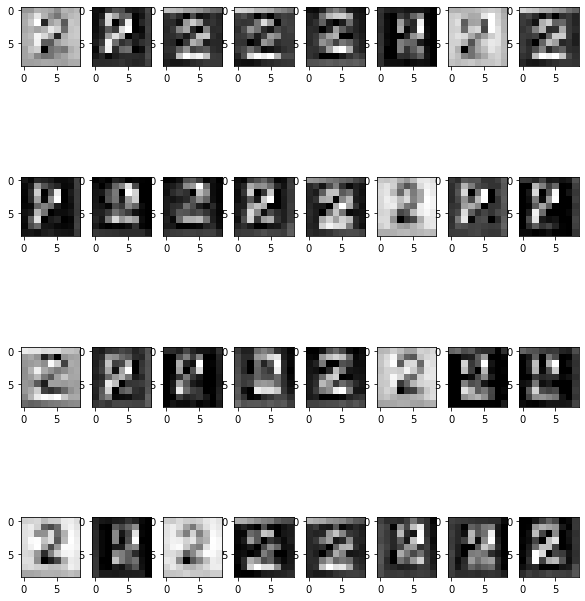

Layer 2:




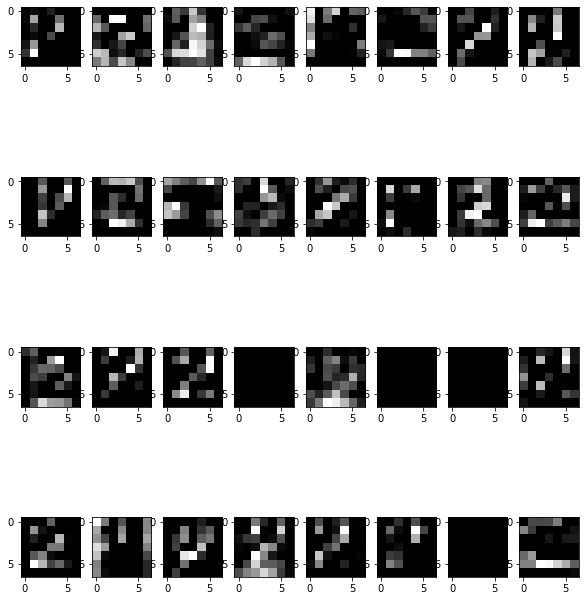


Label: 0
Layer 0:




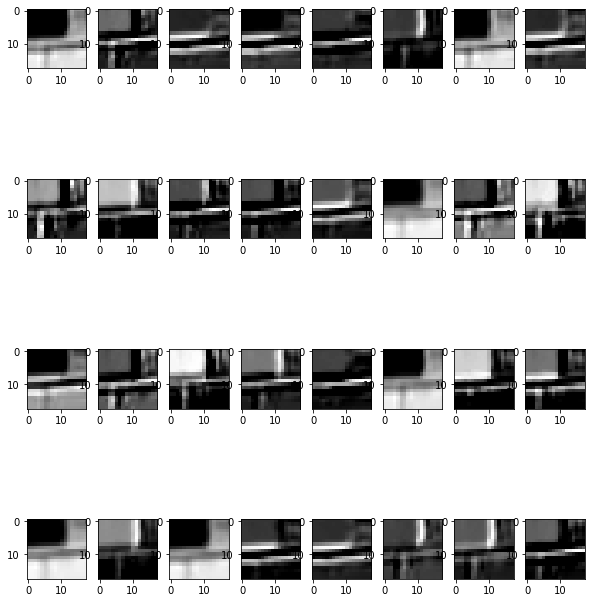

Layer 1:




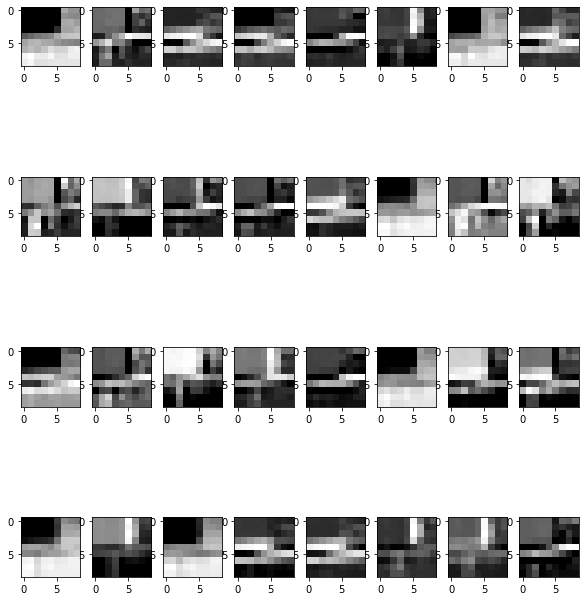

Layer 2:




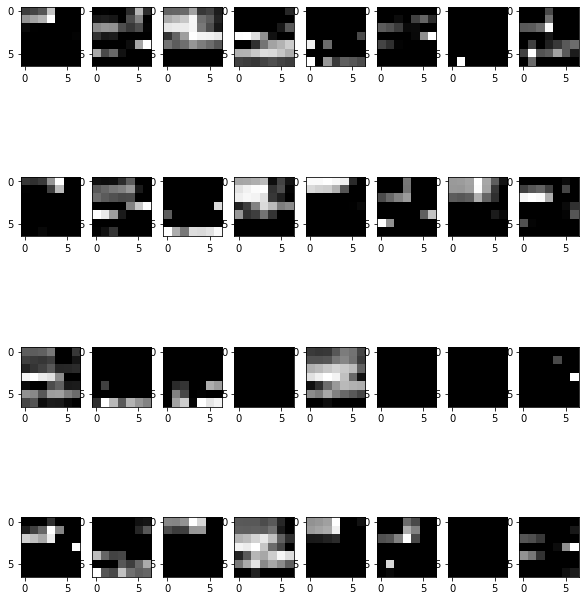


Label: 3
Layer 0:




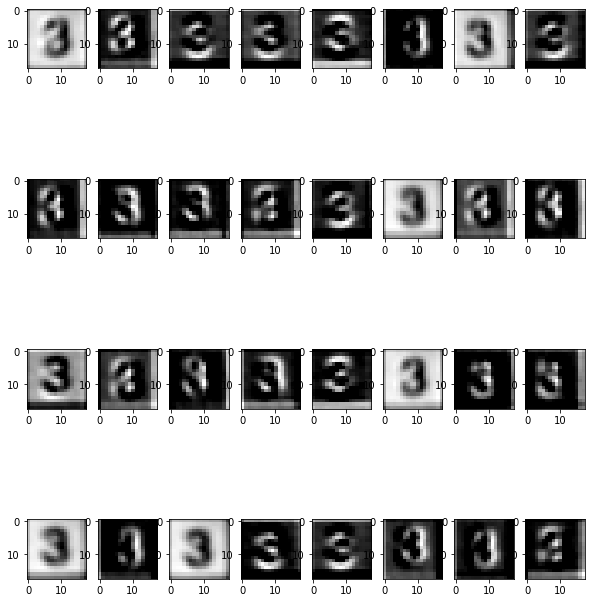

Layer 1:




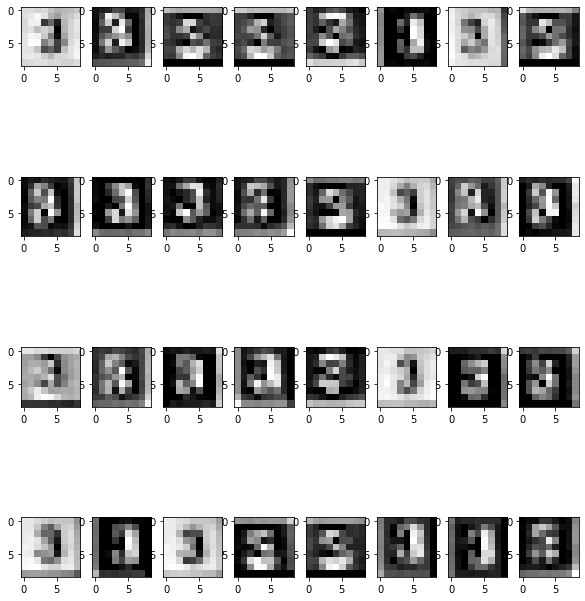

Layer 2:




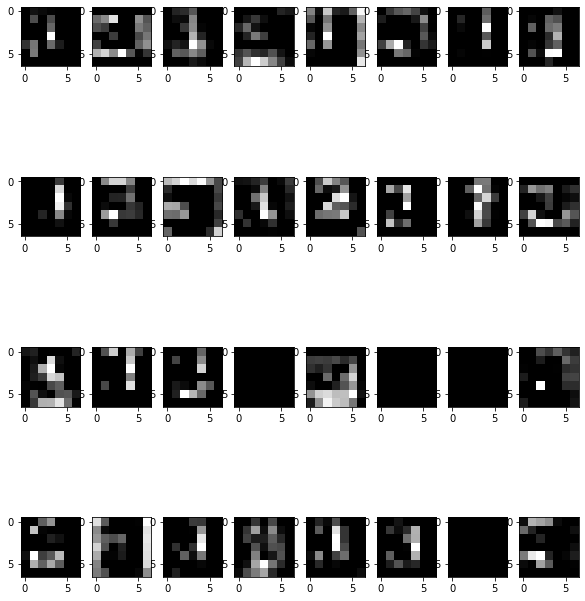


Label: 8
Layer 0:




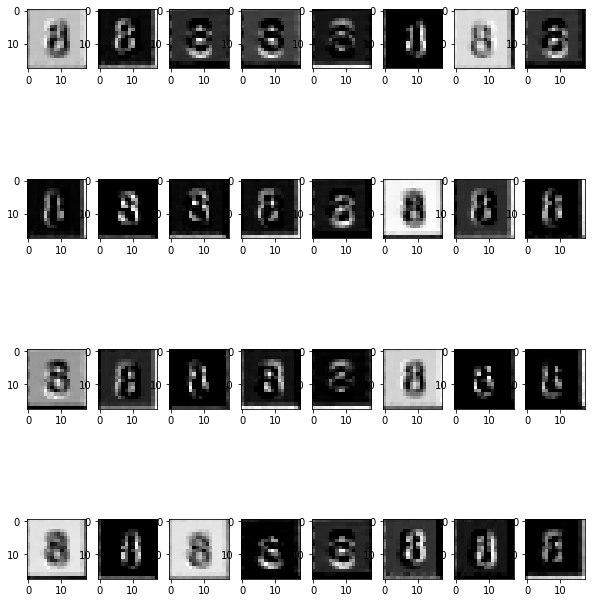

Layer 1:




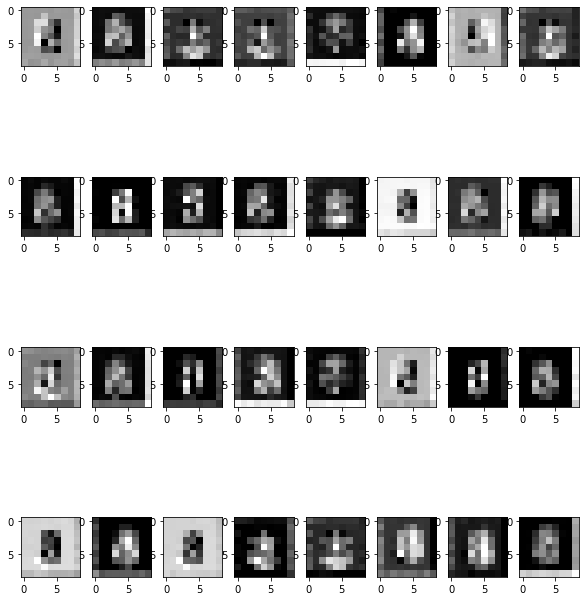

Layer 2:




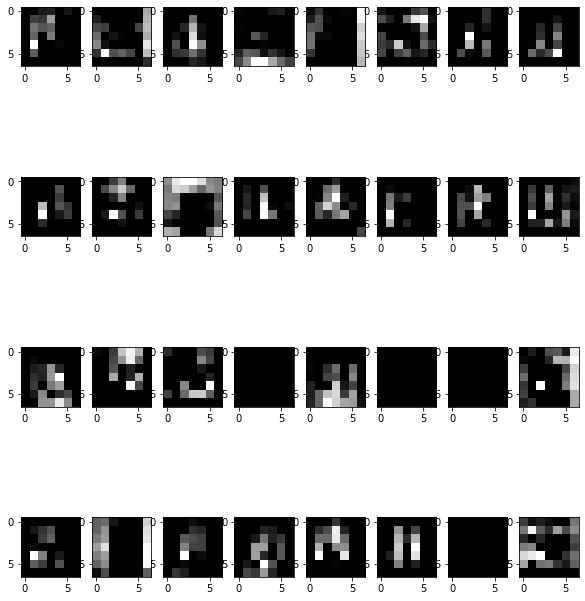


Label: 2
Layer 0:




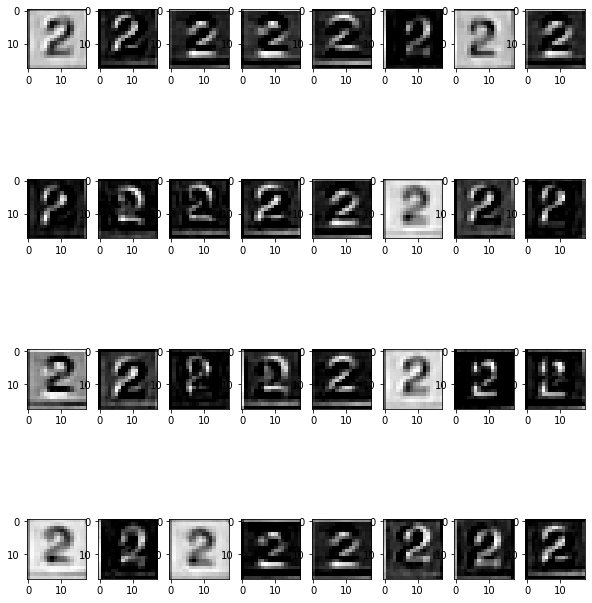

Layer 1:




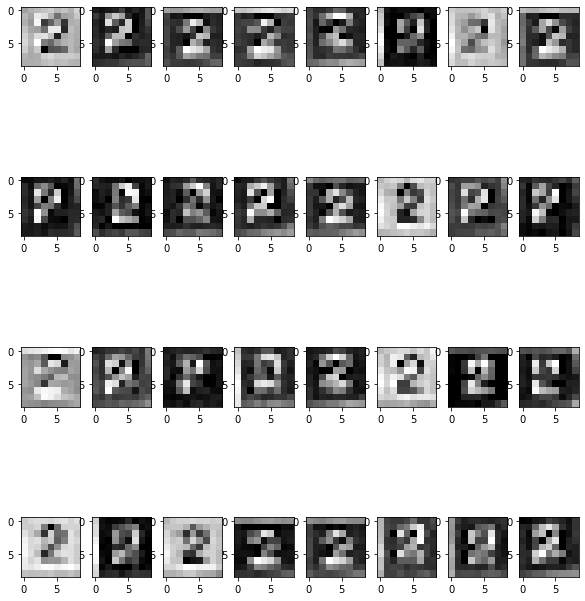

Layer 2:




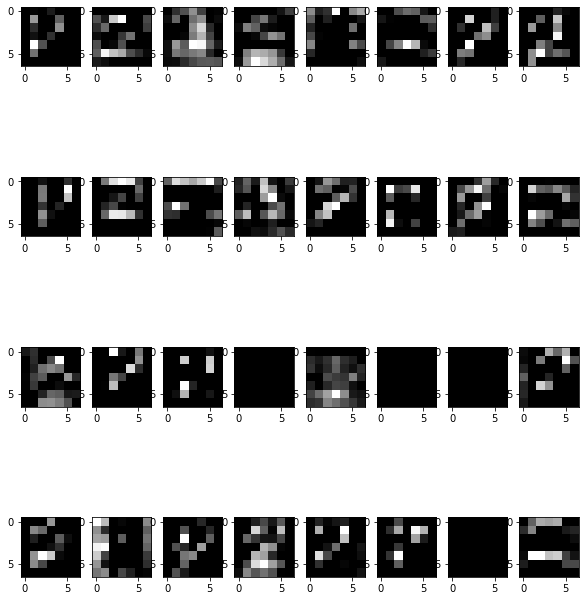

In [10]:
from tensorflow.keras.models import Model
layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

 
def display_activation(activations, col_size, row_size, act_index): 
    activation = activations[act_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1
for i in range(10):
    activations = activation_model.predict(X_Train[i].reshape(1,20,20,1))
    print("\nLabel: "+str(np.argmax(Y_Train[i])))
    for i in range(3):
        print("Layer "+str(i)+":\n\n")
        display_activation(activations, 8, 4, i)
        plt.show()

In [11]:
model.save("DigitClassifier.keras")